# Generating Sign Language Images with DCGAN
## Arda Mavi

### Summary:
Generating sign language images with 'DCGAN' using our own 'Sign Language Dataset'.

#### DCGAN Paper: [arxiv.org/abs/1511.06434](https://arxiv.org/abs/1511.06434)
#### Sign Language Dataset: [github.com/ardamavi/Sign-Language-Digits-Dataset](https://github.com/ardamavi/Sign-Language-Digits-Dataset)

In [11]:
# Import
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Getting Dataset:
from get_dataset import get_dataset
X_train = get_dataset()

Dataset shape: (2062, 64, 64, 1)
2062 sample, 64 x 64 size grayscale image.

Examples:


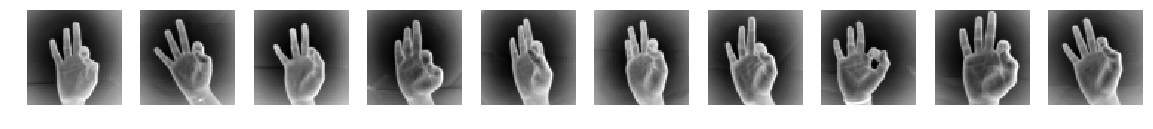

In [3]:
# About Dataset:

img_size = X_train.shape[1] # 64
channel_size = X_train.shape[3] # 1: Grayscale, 3: RGB

print('Dataset shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2] ,'size grayscale image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    # Display data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[i].reshape(img_size, img_size))
    plt.gray()
    plt.axis('off')

In [4]:
# Import Deep Learning libraries:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Activation, Lambda, Flatten, concatenate, Reshape
from keras.models import Model
from keras import backend as K

### Generator Architecture:

In [5]:
input_noise = Input(shape=(100,))

G_fc = Dense(256)(input_noise)
G_fc = Activation('relu')(G_fc)

G_fc = Dense(8*8*256)(G_fc)
G_fc = Activation('relu')(G_fc)

G_rs = Reshape((8, 8, 256))(G_fc)

G_layer = UpSampling2D((2, 2))(G_rs)
G_layer = Conv2D(256, (3, 3), activation='relu', padding='same')(G_layer)

G_layer = UpSampling2D((2, 2))(G_layer)
G_layer = Conv2D(128, (3, 3), activation='relu', padding='same')(G_layer)

G_layer = UpSampling2D((2, 2))(G_layer)
G_layer = Conv2D(64, (3, 3), activation='relu', padding='same')(G_layer)

G_output = Conv2D(channel_size, (3, 3), activation='sigmoid', padding='same')(G_layer)


# Compile Generator:

generator = Model(input_noise, G_output)
generator.compile(optimizer='rmsprop', loss='mse')

print('Generator Architecture:')
generator.summary()

Generator Architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16384)             4210688   
_________________________________________________________________
activation_2 (Activation)    (None, 16384)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 256)    

### Discriminator Architecture:

In [6]:
input_img = Input(shape=(img_size, img_size, channel_size))

D_layer = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
D_layer = MaxPooling2D((2, 2))(D_layer)

D_layer = Conv2D(64, (3, 3), activation='relu', padding='same')(D_layer)
D_layer = MaxPooling2D((2, 2))(D_layer)

D_layer = Conv2D(128, (3, 3), activation='relu', padding='same')(D_layer)
D_layer = MaxPooling2D((2, 2))(D_layer)

D_flt = Flatten()(D_layer)

D_fc = Dense(256)(D_flt)
D_fc = Activation('relu')(D_fc)

D_fc = Dense(128)(D_fc)
D_fc = Activation('relu')(D_fc)


D_fc = Dense(1)(D_fc)
D_output = Activation('sigmoid')(D_fc)


# Compile Discriminator:

discriminator = Model(input_img, D_output)
discriminator.compile(optimizer='adadelta', loss='mse')

print('\n\nDiscriminator Architecture:')
discriminator.summary()



Discriminator Architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)

In [7]:
# DCGAN:

input_dcgan = Input(shape=(100,))
generated_img = generator(input_dcgan)
dcgan_output = discriminator(generated_img)

# Compile DCGAN:

dcgan = Model(input_dcgan, dcgan_output)
dcgan.compile(optimizer='adadelta', loss='mse')

print('\n\nDCGAN Architecture:')
dcgan.summary()



DCGAN Architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
model_1 (Model)              (None, 64, 64, 1)         5196033   
_________________________________________________________________
model_2 (Model)              (None, 1)                 2223105   
Total params: 7,419,138
Trainable params: 7,419,138
Non-trainable params: 0
_________________________________________________________________


Epoch: 0 / 10 
Generator Loss: 0.267466 - Discriminator Loss: 0.251763
Generated Examples:
Epoch: 1 / 10 
Generator Loss: 0.213186 - Discriminator Loss: 0.255163
Generated Examples:
Epoch: 2 / 10 
Generator Loss: 0.199293 - Discriminator Loss: 0.265727
Generated Examples:
Epoch: 3 / 10 
Generator Loss: 0.200465 - Discriminator Loss: 0.269281
Generated Examples:
Epoch: 4 / 10 
Generator Loss: 0.196161 - Discriminator Loss: 0.271001
Generated Examples:
Epoch: 5 / 10 
Generator Loss: 0.198426 - Discriminator Loss: 0.275792
Generated Examples:
Epoch: 6 / 10 
Generator Loss: 0.197357 - Discriminator Loss: 0.272118
Generated Examples:
Epoch: 7 / 10 
Generator Loss: 0.20396 - Discriminator Loss: 0.275118
Generated Examples:
Epoch: 8 / 10 
Generator Loss: 0.199651 - Discriminator Loss: 0.269598
Generated Examples:
Epoch: 9 / 10 
Generator Loss: 0.203261 - Discriminator Loss: 0.274778
Generated Examples:


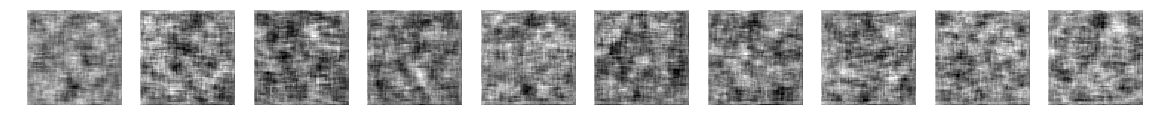

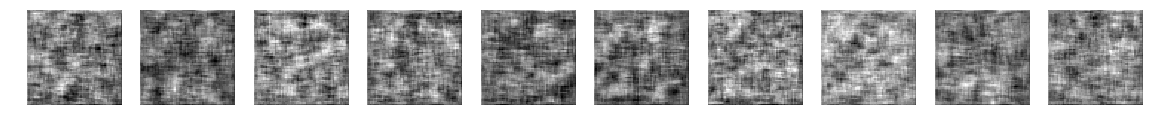

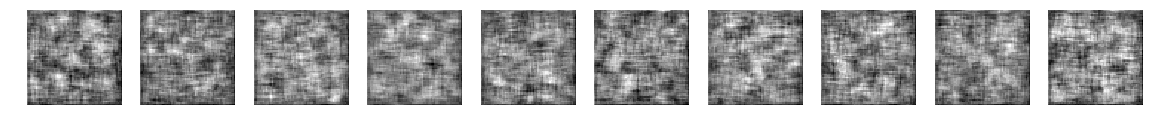

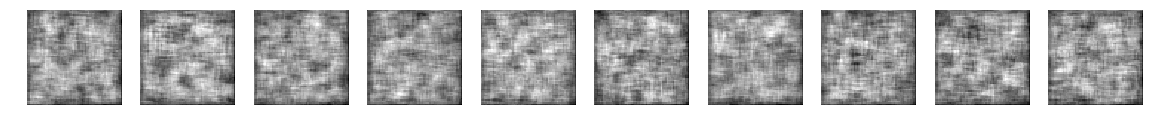

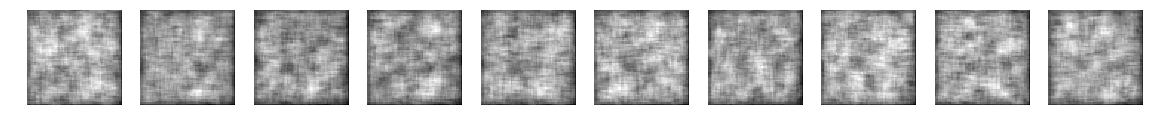

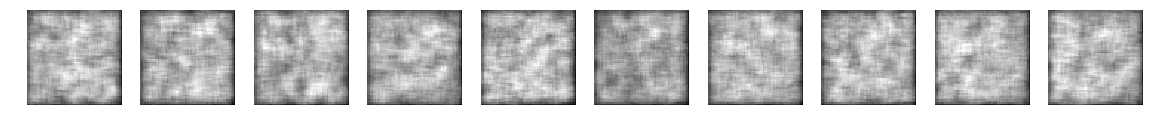

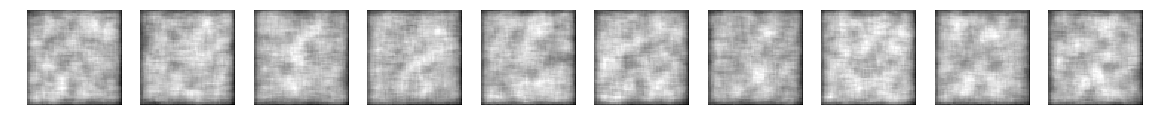

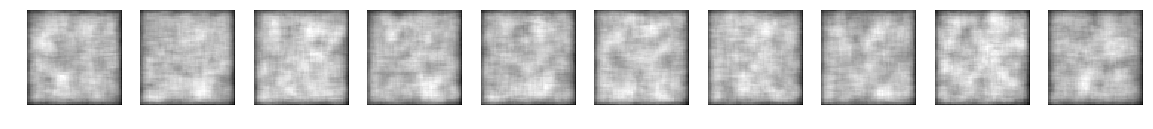

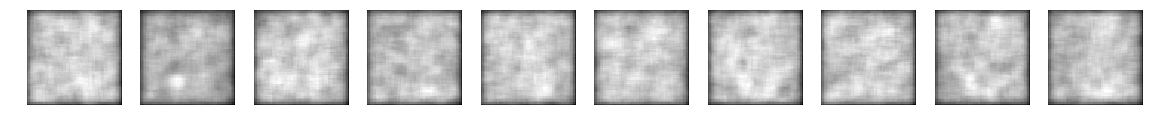

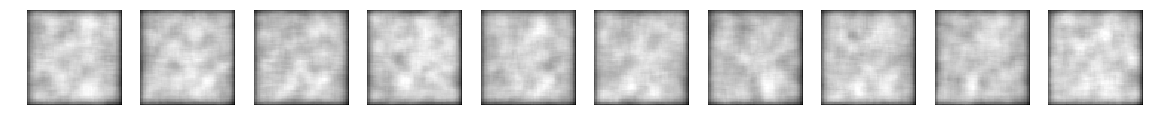

In [8]:
epochs = 10
train_data_size = int(X_train.shape[0]/2)

for epoch in range(epochs):
    
    # Discriminator Training:
    
    # Getting real batch:
    real_imgs_indexes = np.random.randint(0, X_train.shape[0], train_data_size)
    real_imgs = X_train[real_imgs_indexes]
    
    # Getting generated batch:
    noise = np.random.normal(0, 1, (train_data_size, 100))
    generator_imgs = generator.predict(noise)
    
    # Getting batch:
    dis_batch = np.concatenate((real_imgs, generator_imgs), axis=0)
    dis_batch_Y = np.concatenate((np.ones((train_data_size, 1)), np.zeros((train_data_size, 1))), axis=0)
    
    discriminator.trainable = True
    dis_loss = discriminator.train_on_batch(dis_batch, dis_batch_Y)
    
    
    # Generator Training:
    
    noise = np.random.normal(0, 1, (train_data_size, 100))
    
    gen_batch_Y = np.ones((train_data_size, 1))
    
    discriminator.trainable = False
    gen_loss = dcgan.train_on_batch(noise, gen_batch_Y)
    
    print('Epoch:', epoch, '/', epochs, '\nGenerator Loss:', gen_loss, '-', 'Discriminator Loss:', dis_loss)
    
    print('Generated Examples:')
    n = 10
    plt.figure(figsize=(20, 2))
    for i in range(1, n+1):
        ax = plt.subplot(1, n, i)
        noise = K.variable(np.random.normal(0, 1, (1, 100)))
        exmpl_gen_img = K.eval(generator(noise))
        plt.imshow(exmpl_gen_img.reshape(img_size, img_size))
        plt.gray()
        plt.axis('off')
    plt.show()

### Get and save models functions:

In [15]:
# Save Models:
def save_models(dcgan, generator, discriminator):
    
    if not os.path.exists('Data/Models/'):
        os.makedirs('Data/Models/')
        
    model_json = dcgan.to_json()
    with open("Data/Models/dcgan_model.json", "w") as model_file:
        model_file.write(model_json)
    dcgan.save_weights("Data/Models/dcgan_weights.h5")
    
    model_json = generator.to_json()
    with open("Data/Models/generator_model.json", "w") as model_file:
        model_file.write(model_json)
    generator.save_weights("Data/Models/generator_weights.h5")
    
    model_json = discriminator.to_json()
    with open("Data/Models/discriminator_model.json", "w") as model_file:
        model_file.write(model_json)
    discriminator.save_weights("Data/Models/discriminator_weights.h5")
    
    print('Models and weights saved')
    return



# Get Models:
from keras.models import model_from_json

def get_models():
    with open('Data/Models/dcgan_model.json', 'r') as model_file:
        dcgan = model_from_json(model_file.read())
    dcgan.load_weights("Data/Models/dcgan_weights.h5")

    with open('Data/Models/generator_model.json', 'r') as model_file:
        generator = model_from_json(model_file.read())
    generator.load_weights("Data/Models/generator_weights.h5")

    with open('Data/Models/discriminator_model.json', 'r') as model_file:
        discriminator = model_from_json(model_file.read())
    discriminator.load_weights("Data/Models/discriminator_weights.h5")
    return dcgan, generator, discriminator

In [16]:
# Save models:
save_models(dcgan, generator, discriminator)

Models and weights saved


True

In [ ]:
dcgan, generator, discriminator = get_models()

In [ ]:
print('Generated Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    noise = K.variable(np.random.normal(0, 1, (1, 100)))
    exmpl_gen_img = K.eval(generator(noise))
    plt.imshow(exmpl_gen_img.reshape(img_size, img_size))
    plt.gray()
    plt.axis('off')
plt.show()